In [1]:
import numpy as np
import pandas as pd
import os
# import zipfile
import pickle
from matplotlib import pyplot as plt

In [2]:
# def unzip_all_files(source_dir, destination_dir):
#     # Iterate through all files in the source directory
#     for file_name in os.listdir(source_dir)[1:]:
#         # Construct the full path of the file
#         file_path = os.path.join(source_dir, file_name)

#         # Check if the file is a zip archive

#         if zipfile.is_zipfile(file_path):
#             # Open the zip archive
#             with zipfile.ZipFile(file_path, 'r') as zip_ref:
#                 # Extract all files to the destination directory
#                 zip_ref.extractall(destination_dir)
#                 print(f"Extracted files from {file_name} to {destination_dir}")
#         else:
#             print(f"{file_name} is not a zip file. Skipping...")

# # Usage example

# destination_directory = 'CEOD_GEnx/csv files'

In [3]:
# flight_file_path = "C:/Users/mohsy/University/KLM/Air France KLM/ES Data Team - GEnx CEOD/"
# # zip_files = os.listdir(flight_file_path)[1:]
# unzip_all_files(flight_file_path, destination_directory)

In [4]:
# for zip_file in zip_files:
#     with ZipFile(flight_file_path + "/" + zip_file, 'r') as zip:
#         # extracting all the files
# #         print('Extracting all the files now...')
# #         zip.extractall()
#         for csv_file in zip.namelist():
#             df = pd.read_csv(zip.open(csv_file))[0]

#     print(df.shape)
#     break

In [5]:
ToExtractParams = [
    # "FADEC Bit-packed Trigger Word : CLIMB CONDITIONS DETECTED",
    "Offset",
    "Selected Core Compartment Cooling (CCC) Valve Position (%)",
    "Selected CAI (Cowl Anti Ice) Bleed Config",
    "Selected Booster Anti-Ice (BAI) Pressure (PSIA)",
    "Selected Transient Bleed Valve (TBV) Position (%)",
    "Selected Variable Bleed Valve (VBV) Position (%)",
    "Selected Variable Stator Vane (VSV) Position (%)",
    "Selected HP Turbine Active Clearance Control Valve Position (%)",
    "Selected LP Turbine Active Clearance Control Valve Position (%)",
    "Total Engine Horsepower Extraction (HP)",
    "Selected Mass Fuel Flow (PPH)",
    "Average Gas Temperature at Station 25 (DEG_C)",
    "Calculated Ambient Temperature (DEG_C)",
    "Selected Compressor Delay Total Temperature (DEG_C)",  # TT3
    "Selected Compressor Discharge Static Pressure (PSIA)",
    "Selected Ambient Static Pressure (PSIA)",
    "Selected Exhaust Gas Temperature (DEG_C)",
    "Selected HP Comp Inlet Total Temperature (DEG_C)",
    "Selected PT2 Pressure (PSIA)",
    "Selected Total Temperature at Station 12 (DEG_C)",
    "Selected Fan Speed (%)",
    "Corrected Fan Speed to Station 12 (%)",
    "Selected Core Speed (%)",
    "Corrected Core Speed to Station 25 (%)",
    "Core Speed Rate of Change (%N2/SEC)",
    "Altitude based on P0 (FT)",
    "UVL_FLIGHTPHS",
    "Selected Mach Number (MACH)",
    "Pitch Angle from Aircraft (DEGREES)",
    "Roll Angle from Aircraft (DEGREES)",
    "Calculated Core Airflow (PPS)",
    # "Calculated Fuel to Air Ratio"
    'Header: Start Date'
]

In [20]:
for file in os.listdir("CEOD_GEnx/csv files"):
    print('hi')
#     file = '200408-203904-KLM168____-KATLEHAM-KL_PH-BHA-2-956609-W010FFD.csv'
    file = '160801-040522-KLM884____-ZSAMEHAM-KL_PH-BHA-2-956609-W007FFD.csv'
    data = pd.read_csv("CEOD_GEnx/csv files/" + file, skiprows=1, index_col=False, header=0, dtype=np.float32, usecols=ToExtractParams)
    data["Header: Start Date"][:]  = data['Header: Start Date'][0]
    dataCL = data[(data["UVL_FLIGHTPHS"] == 6)]
#     dataCL = dataCL.tail(50)
#     print(dataCL.shape)
    break

hi


In [21]:
data   = data.dropna(axis=0).reset_index(drop=True)
dataCL = dataCL.dropna(axis=0).reset_index(drop=True)
#     dataCL = dataCL.tail(50)
    
    
#     dataCL = dataCL.dropna(axis=0).reset_index(drop=True)
    
dataCL = dataCL[(dataCL["Core Speed Rate of Change (%N2/SEC)"] > - 0.1)
               & (dataCL["Core Speed Rate of Change (%N2/SEC)"] < 0.1)
               & (dataCL["Selected HP Turbine Active Clearance Control Valve Position (%)"] < 20)
               & (dataCL["Selected LP Turbine Active Clearance Control Valve Position (%)"] < 55)
               & (dataCL["Selected CAI (Cowl Anti Ice) Bleed Config"] > 0.1)
               & (dataCL["Altitude based on P0 (FT)"] < 35000)
               & (dataCL["Altitude based on P0 (FT)"] > 28000)
               & (np.round(dataCL["Corrected Fan Speed to Station 12 (%)"], 1) != 101.8)
               ]
dataTO = data[(data["Core Speed Rate of Change (%N2/SEC)"] > - 0.2)
          & (data["Core Speed Rate of Change (%N2/SEC)"] < 0.2)
          & (data["UVL_FLIGHTPHS"] == 4)
          & (data["Selected Transient Bleed Valve (TBV) Position (%)"] < 1)
          & (data["Selected Variable Bleed Valve (VBV) Position (%)"] < -0.1)
          & (data["Selected Variable Stator Vane (VSV) Position (%)"] < 90)
#               & (data["Selected HP Turbine Active Clearance Control Valve Position (%)"] < 25)
          & (data["Selected LP Turbine Active Clearance Control Valve Position (%)"] < 48)
          & (data["Selected CAI (Cowl Anti Ice) Bleed Config"] < 0.1)
          & (data["Pitch Angle from Aircraft (DEGREES)"] > 0.5)
          ]

dataCR = data[(data["Core Speed Rate of Change (%N2/SEC)"] > - 0.1)
          & (data["Core Speed Rate of Change (%N2/SEC)"] < 0.1)
          & (data["UVL_FLIGHTPHS"] == 7)
          & (data["Selected Transient Bleed Valve (TBV) Position (%)"] < 1)
          & (data["Selected Booster Anti-Ice (BAI) Pressure (PSIA)"] < 10)
          & (data["Selected CAI (Cowl Anti Ice) Bleed Config"] > 0.1)
          & (data["Selected Booster Anti-Ice (BAI) Pressure (PSIA)"] < 5)
          & (data["Selected Core Compartment Cooling (CCC) Valve Position (%)"] > 99)
          & (data["Selected Variable Bleed Valve (VBV) Position (%)"] < -0.08)
          & (data["Selected Variable Bleed Valve (VBV) Position (%)"] > -0.19)
          & (data["Selected Variable Stator Vane (VSV) Position (%)"] < 80)
          & (data["Selected HP Turbine Active Clearance Control Valve Position (%)"] < 70)
          & (data["Selected HP Turbine Active Clearance Control Valve Position (%)"] > 40)
          & (data["Selected LP Turbine Active Clearance Control Valve Position (%)"] > 70)
          ]
#     print(dataCL)
print(dataTO.shape)
print(dataCL.shape)
print(dataCR.shape)

(6, 32)
(70, 32)
(746, 32)


In [22]:
ind_drop = np.array([], dtype=np.int32)

unique_n1C = np.unique(dataCR['Corrected Fan Speed to Station 12 (%)'].values.round(decimals=0))

unique_Alt = np.unique(dataCR["Altitude based on P0 (FT)"].values.round(decimals=-3))

for i in range(len(unique_Alt)):
    # ind_N1c = np.array([], dtype=np.int32)
    indicesA = np.where(dataCR["Altitude based on P0 (FT)"].values.round(decimals=-3) == unique_Alt[i])[0]
    for j in range(len(unique_n1C)):
        indicesN = \
        np.where(dataCR['Corrected Fan Speed to Station 12 (%)'].values.round(decimals=0) == unique_n1C[j])[0]
        indices = np.intersect1d(indicesA, indicesN)
        if len(indices) >= 5:
            ind_drop = np.append(ind_drop, indices[:5])
        else:
            ind_drop = np.append(ind_drop, indices[:len(indices)+1])

dataCR2 = dataCR.loc[dataCR.index[ind_drop]]

GEnx_ODL, GEnx_OD_trueL, N1cCEODL, N1CEODL = [], [], [], []

for i, dataI in enumerate([dataTO, dataCL, dataCR2]):  #

    data = dataI

    g = 1.4
    isentr = 1 + (g - 1) * 0.5 * data["Selected Mach Number (MACH)"] ** 2
    TsComp = (data["Selected Total Temperature at Station 12 (DEG_C)"] + 273.15) / isentr
    PsComp = (data["Selected PT2 Pressure (PSIA)"] * 0.0689475729) / isentr ** (g / (g - 1))

    # N1c = data["Selected Fan Speed (%)"]/np.sqrt((data["Selected Total Temperature at Station 12 (DEG_C)"] + 273.15)/288)
    N1cdp = 94.96 / (np.sqrt((287.5*275.55) / (288.15 * 287.05)))  # old model (un-calib)
    N1cdp2 = 96.96/(np.sqrt((288.18*285.6)/(288.15*287.05)))  # new model (calib) + martijn model
    # N1c   = 100*data["Selected Fan Speed (%)"]\
    #         / (np.sqrt((288*(data["Selected Total Temperature at Station 12 (DEG_C)"] + 273.15))/(288.15*287.05))) / N1cdp
    N1c   = 100*data["Selected Fan Speed (%)"]\
            / (np.sqrt((288*(data["Selected Total Temperature at Station 12 (DEG_C)"] + 273.15))/(288.15*287.05))) / N1cdp2

    GEnx_OD_true = np.vstack((data["Selected Fan Speed (%)"],
                              N1c,
                              data["Corrected Fan Speed to Station 12 (%)"],
                              data["Selected HP Comp Inlet Total Temperature (DEG_C)"] + 273.15,
                              data["Selected Compressor Delay Total Temperature (DEG_C)"] + 273.15,
                              data["Selected Compressor Discharge Static Pressure (PSIA)"] * 0.0689475729,
                              data["Selected Exhaust Gas Temperature (DEG_C)"] + 273.15,
                              data["Selected Mass Fuel Flow (PPH)"] * 0.0001259979,
                              data["Selected Core Speed (%)"]
                              # data["Calculated Core Airflow (PPS)"] * 0.45359237
                              # data["Selected PT2 Pressure (PSIA)"] * 0.0689475729,
                              # data["Selected Total Temperature at Station 12 (DEG_C)"] + 273.15
                              )).T

    GEnx_OD_true = GEnx_OD_true[GEnx_OD_true[:, 1].argsort()]

    GEnx_OD_true = np.flip(GEnx_OD_true, axis=0)
    N1CEOD       = GEnx_OD_true[:, 0]
    N1cCEOD      = GEnx_OD_true[:, 2]
    GEnx_OD_true = GEnx_OD_true[:, 3:]


    GEnx_OD = np.vstack((N1c,
                         # data["Corrected Fan Speed to Station 12 (%)"],
                         PsComp,
                         TsComp,
                         # data["Selected Ambient Static Pressure (PSIA)"] * 0.0689475729,
                         # data["Calculated Ambient Temperature (DEG_C)"] + 273.15,
                         data["Selected Mach Number (MACH)"],
                         data["Total Engine Horsepower Extraction (HP)"] * 0.745699872)).T

    GEnx_OD = GEnx_OD[GEnx_OD[:, 0].argsort()]
    GEnx_OD = np.flip(GEnx_OD, axis=0)
    Cv      = np.full((GEnx_OD.shape[0], 1), 0.98) if i==0 else np.full((GEnx_OD.shape[0], 1), 1)
    # GEnx_OD = np.hstack((GEnx_OD, Cv))

    GEnx_ODL.append(GEnx_OD)
    GEnx_OD_trueL.append(GEnx_OD_true)
    N1cCEODL.append(N1cCEOD)
    N1CEODL.append(N1CEOD)

(103,)


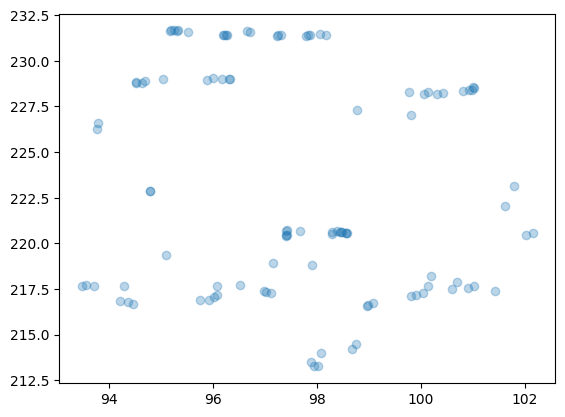

{'whiskers': [<matplotlib.lines.Line2D at 0x22a5fffa310>,
 'caps': [<matplotlib.lines.Line2D at 0x22a5fffa970>,
 'boxes': [<matplotlib.lines.Line2D at 0x22a6016be80>],
 'medians': [<matplotlib.lines.Line2D at 0x22a600080d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22a60008460>],
 'means': []}

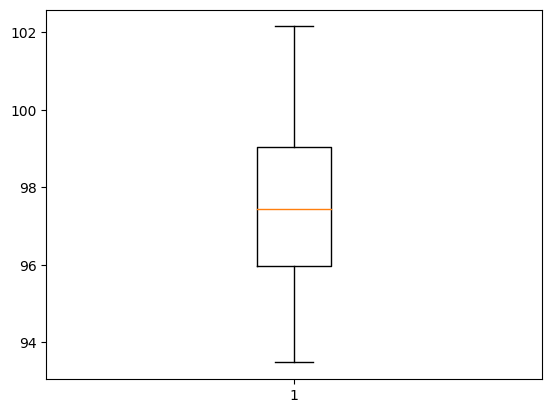

In [32]:
# for i in range(3):
flight_phase = 2
print(GEnx_ODL[flight_phase][:,0].shape)
plt.scatter(GEnx_ODL[flight_phase][:,0], GEnx_ODL[flight_phase][:,2], alpha=0.3)
plt.show()

plt.boxplot(GEnx_ODL[flight_phase][:,0])

In [ ]:
# pickle.dump([GEnx_ODL, GEnx_OD_trueL, N1cCEODL], open("CEOD_GEnx/CEOD_" + file.strip(".csv") + ".p", "wb"))

In [ ]:
# GEnx_ODL, GEnx_OD_trueL, N1cCEODL = pickle.load(open("CEOD_GEnx/CEOD_200408-203904-KLM168____-KATLEHAM-KL_PH-BHA-2-956609-W010FFD.p",
#                                                     "rb"))
# 
# print(GEnx_ODL[2].shape)